In [ ]:
'''
The model should be able to predict if a person has a bank account or not given certain data. This would help banks advertise their openning of new bank account offers to the right demographic
'''

'\nThe model should be able to predict if a person has a bank account or not given certain data. This would help banks advertise their openning of new bank account offers to the right demographic\n'

In [ ]:
#gtting the important libraries
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
'''
STEP 1: Having a brief overview of the data
'''

'\nSTEP 1: Having a brief overview of the data\n'

In [ ]:
#loading the data
train_data = pd.read_csv('/content/drive/MyDrive/hackathon zambia/Train_v2.csv')
test_data = pd.read_csv('/content/drive/MyDrive/hackathon zambia/Test_v2.csv')
variables = pd.read_csv('/content/drive/MyDrive/hackathon zambia/VariableDefinitions.csv')


In [ ]:
#understanding what each variable measures
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
#having a glance of our dataframe
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#As can be seen from the bank account column we have a classification problem, and accuracy score would be the best metric for grading our model
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#we need to look for missing values in our dataframe so that we could either drop those columns or have them imputed with the most frequent data for that column
train_data.isnull().sum()
test_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
#getting a statiscal overview of our dataframe
train_data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
#knowing the datatypes avialable in each column, this would help us with knowing which preprocessing techniques to use. eg lebel encoding
train_data.dtypes 

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [ ]:
'''
STEP 2: Have a deeper stastical view of our data set. This helps us know wich features are important for learning, and which ones bring noise
'''

'\nSTEP 2: Have a deeper stastical view of our data set. This helps us know wich features are important for learning, and which ones bring noise\n'

In [ ]:
#because wwe have a binary problem, we need to search for imbalance in our data
train_data.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

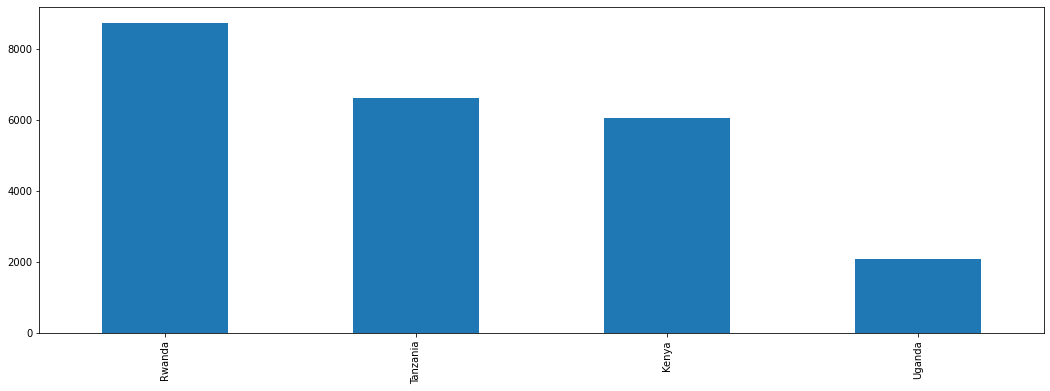

In [ ]:
'''
Studying our low acrdinailty variables first using a bar chart, as bar charts help us easily compare binary 
'''

#looking at country data. from the data information provided at zindi, year and country data are identical
train_data['country'].value_counts().plot(kind='bar', figsize=[18,6])

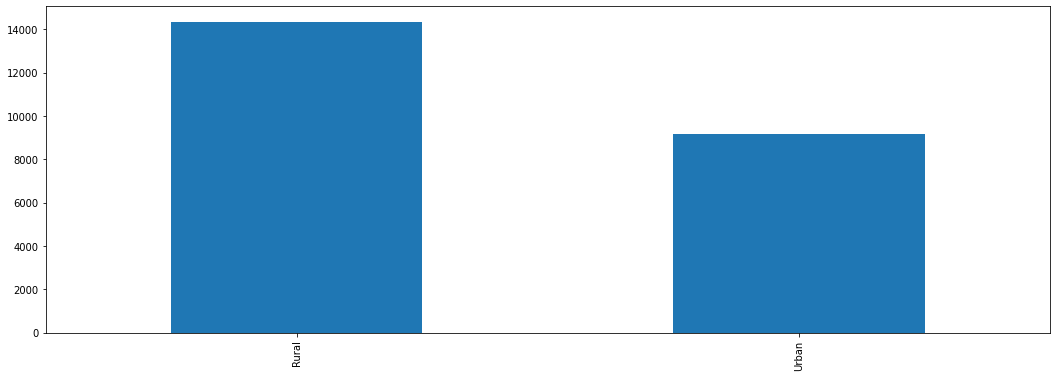

In [ ]:
#looking at area of residency data
train_data['location_type'].value_counts().plot(kind='bar', figsize=[18,6])

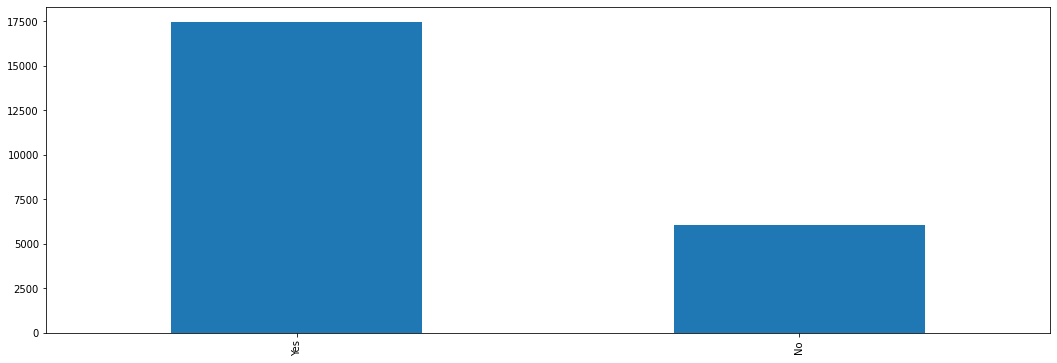

In [ ]:
#cellphone access data
train_data['cellphone_access'].value_counts().plot(kind='bar', figsize=[18,6])

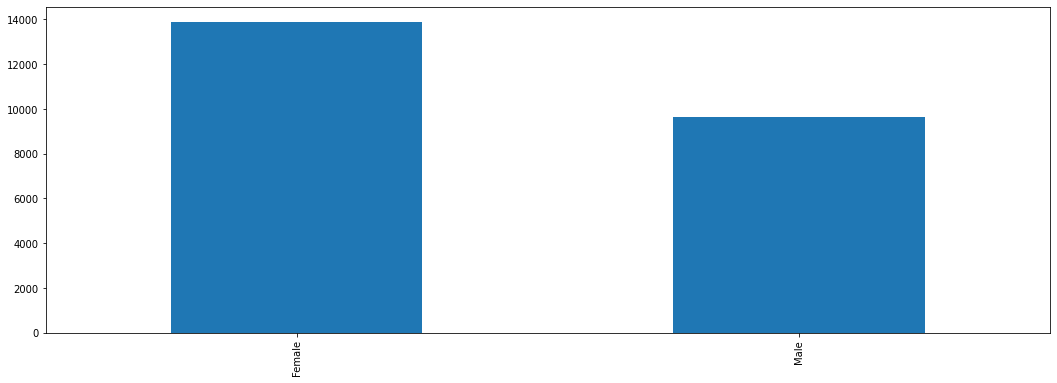

In [ ]:
#gender data
train_data['gender_of_respondent'].value_counts().plot(kind='bar', figsize=[18,6])

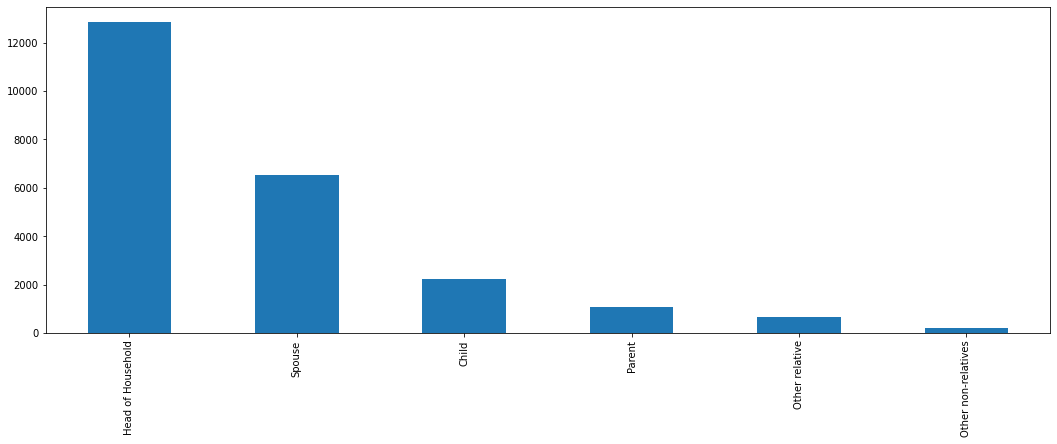

In [ ]:
#Relations of respondant
train_data['relationship_with_head'].value_counts().plot(kind='bar', figsize=[18,6])



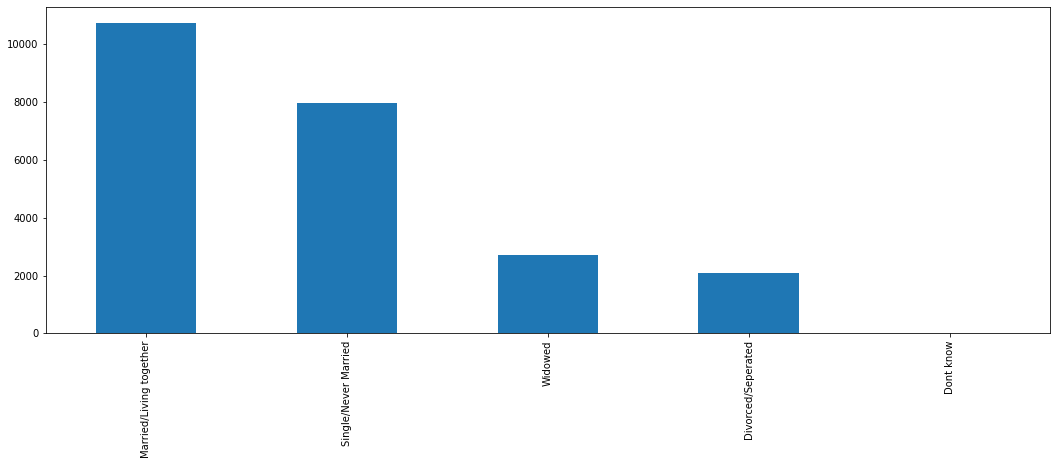

In [ ]:
#marital status
train_data['marital_status'].value_counts().plot(kind='bar', figsize=[18,6])

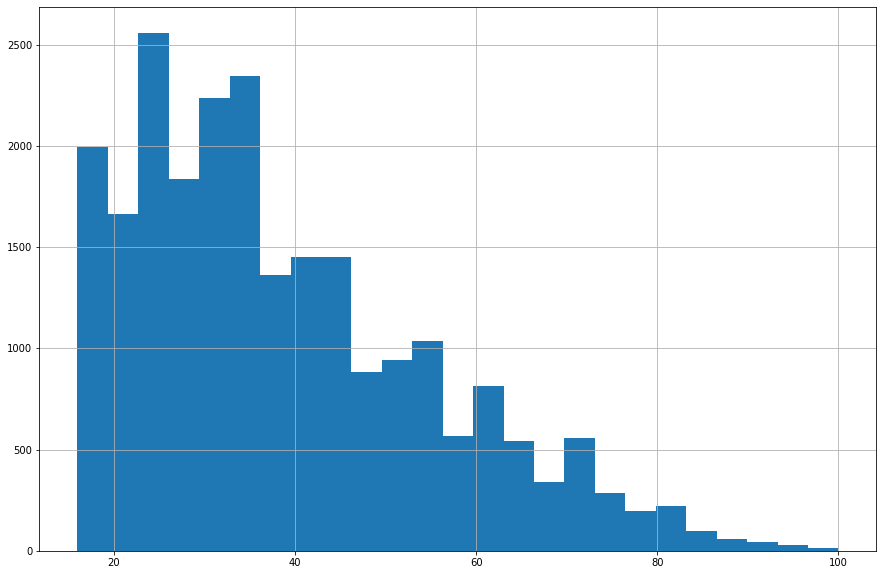

In [ ]:
'''
as the remaining varibales are expressed as discrete varibaes a histogram would best represnt that data
'''

#age
age = train_data.age_of_respondent.hist(bins=25, figsize=[15,10])



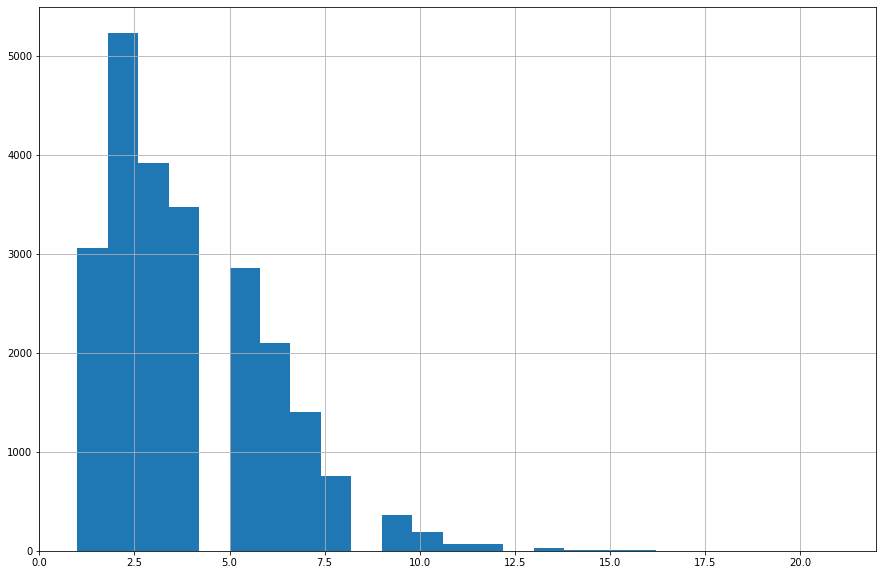

In [ ]:
#household size
age = train_data.household_size.hist(bins=25, figsize=[15,10])



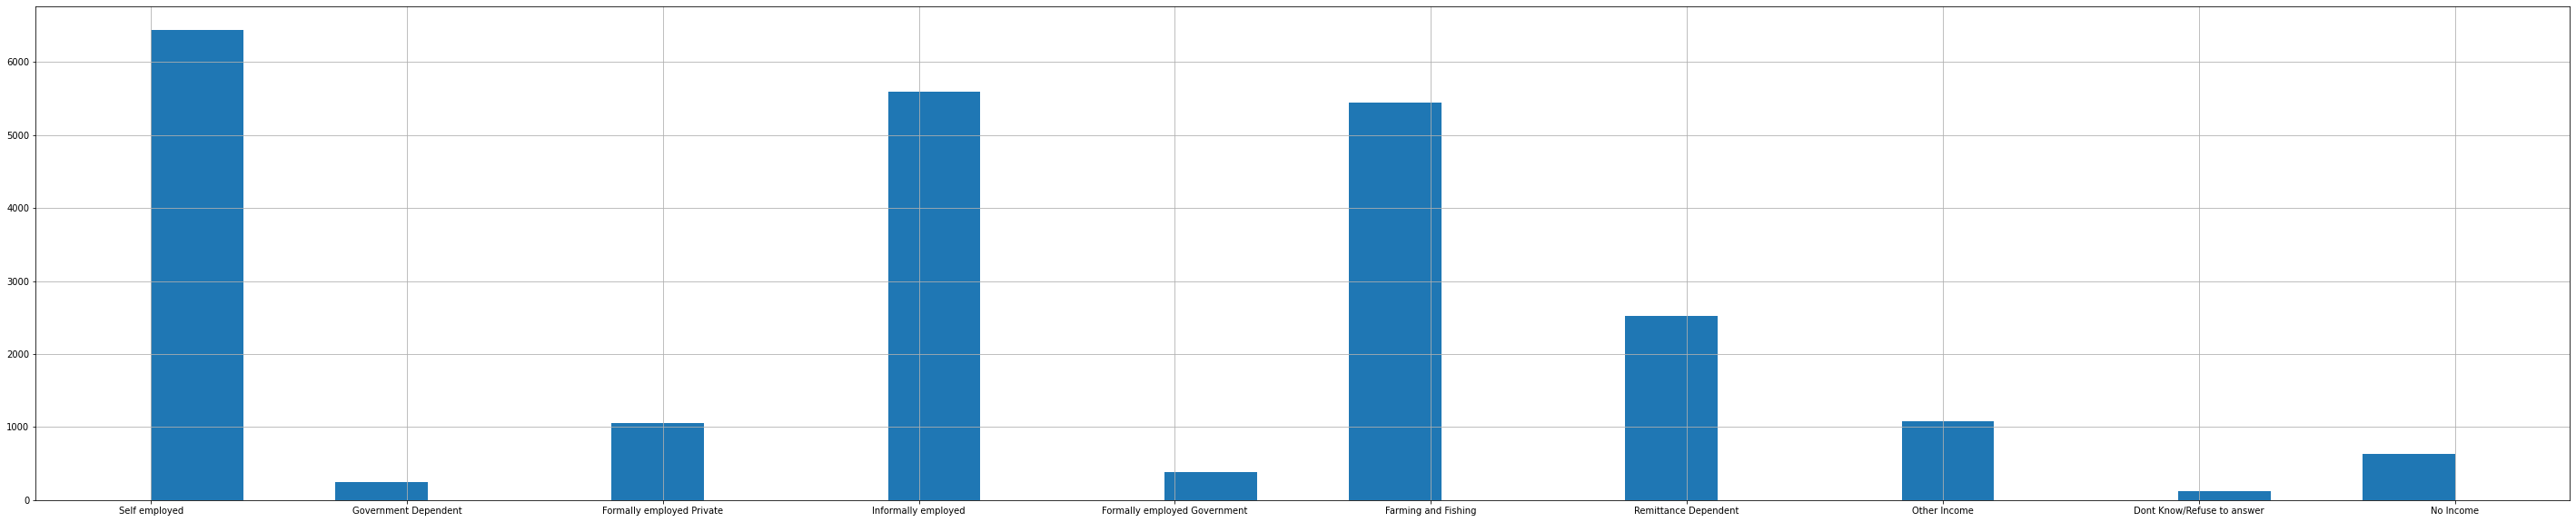

In [ ]:
#job description
age = train_data.job_type.hist(bins=25, figsize=[50,10])



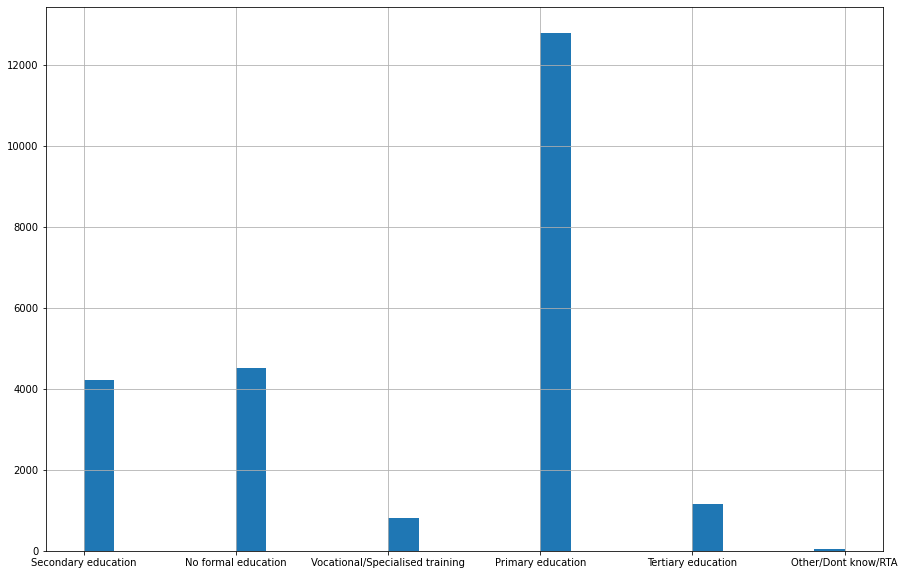

In [ ]:
#education
age = train_data.education_level.hist(bins=25, figsize=[15,10])


In [ ]:
'''
STEP 3: Preprocessing data
'''
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# Convert target label to numerical Data
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])
 
#Separate training features from target
X_train = train_data.drop(['year', 'bank_account'], axis=1)
#for the sake of fitting with the test set
X_test = test_data.drop(['year'], axis=1)
y_train = train_data['bank_account']
 
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [ ]:
# function to preprocess our data from train models
 
def preprocessing_data(data):
 
    # Convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent"]].values.astype(
       float
    )

    # categorical features to be converted by One Hot Encoding
    categ = [
        "relationship_with_head",
        "marital_status",
        "education_level",
        "job_type",
        "country",
    ]
 
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
 
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
 
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
 
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
 
    return data

In [ ]:
# preprocess the train data 
processed_train_data = preprocessing_data(X_train)
#initial
#processed_test_data = preprocessing_data(test_data)
processed_test_data = preprocessing_data(X_test)

In [ ]:
# Split train_data
from sklearn.model_selection import train_test_split
 
X_Train, X_val, y_Train, y_val = train_test_split(processed_train_data, y_train, stratify = y_train,
                                                  test_size = 0.1, random_state=42)

In [ ]:
'''
STEP 4: Definnig our model
'''
#import XGBClassifier
from xgboost import XGBClassifier
 
my_model = XGBClassifier()
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
 
# Optimize model paramaters 
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
my_model2 = GridSearchCV(my_model, param_grid,n_jobs=-1,verbose=2,cv=2)
my_model2.fit(X_Train, y_Train)
print(my_model2.best_params_)

Fitting 2 folds for each of 405 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 13.6min finished


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.6}


In [ ]:
# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(colsample_bytree=0.6, min_child_weight=1, gamma=5, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_val)

# Get error rate
print("Error rate of the  XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the  XGB classifier:  0.1079473013174671


In [ ]:
'''
STEP 5: making the predictions
'''
# Get the predicted result for the test Data
test_data.bank_account = xgb_model.predict(processed_test_data)

# create submission DataFrame
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})

# Create submission csv file
submission.to_csv('/content/drive/MyDrive/hackathon zambia/submission_final_1.csv', index = False)